In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
train = pd.read_csv('./data/train.csv')
train.head()

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0


In [3]:
# 결측치 확인 :  결측치 없음
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30200 entries, 0 to 30199
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       30200 non-null  object 
 1   가입일      30200 non-null  int64  
 2   음성사서함이용  30200 non-null  int64  
 3   주간통화시간   30200 non-null  float64
 4   주간통화횟수   30200 non-null  int64  
 5   주간통화요금   30200 non-null  float64
 6   저녁통화시간   30200 non-null  float64
 7   저녁통화횟수   30200 non-null  int64  
 8   저녁통화요금   30200 non-null  float64
 9   밤통화시간    30200 non-null  float64
 10  밤통화횟수    30200 non-null  int64  
 11  밤통화요금    30200 non-null  float64
 12  상담전화건수   30200 non-null  int64  
 13  전화해지여부   30200 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 3.2+ MB


In [4]:
# 데이터 기술 통계량
train.describe()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
count,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000
mean,159.732649,12.037815,250.563457,159.175728,41.091447,263.247215,158.474536,25.394260,263.438285,157.047417,12.074648,2.288079,0.109868
std,123.752781,24.925334,84.403350,101.573057,23.179017,74.064922,102.200293,8.146126,73.778416,101.721601,9.414261,2.050746,0.312730
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,20.800000,20.000000,1.040000,0.000000,0.000000
25%,63.000000,0.000000,222.800000,88.000000,24.400000,223.700000,87.000000,22.220000,223.700000,87.000000,4.700000,2.000000,0.000000
50%,118.000000,1.000000,234.000000,117.500000,30.800000,243.000000,112.000000,23.320000,242.800000,108.000000,9.080000,2.000000,0.000000
75%,228.000000,22.000000,289.600000,223.000000,45.900000,290.300000,223.000000,28.820000,290.500000,222.000000,20.290000,2.000000,0.000000
max,2212.000000,1112.000000,481.900000,489.000000,118.600000,481.600000,489.000000,49.980000,481.800000,490.000000,44.980000,11.000000,1.000000


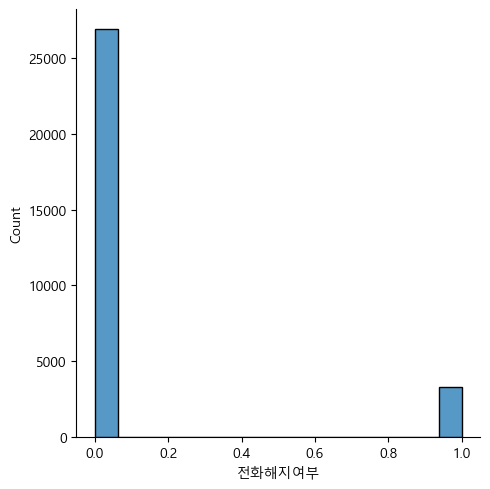

In [5]:
## 시각화
# 종속 변수 분포 확인
# 해지 1, 유지 0
plt.rc('font', family='Malgun Gothic')
sns.displot(x = train['전화해지여부'])
plt.show()

In [6]:
# 해지 수 count
train['전화해지여부'].value_counts()

0    26882
1     3318
Name: 전화해지여부, dtype: int64

In [7]:
train['주간통화시간'].value_counts(sort=True)


224.0    204
223.8    202
223.5    198
223.7    195
224.1    194
        ... 
198.2      1
423.0      1
131.7      1
476.7      1
164.7      1
Name: 주간통화시간, Length: 2771, dtype: int64

In [8]:
train[train['주간통화시간'] >200] 

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
6,TRAIN_00006,89,1,228.8,83,82.3,289.9,23,29.86,283.2,221,8.92,2,0
7,TRAIN_00007,290,1,223.9,99,31.0,294.2,203,26.82,290.1,209,22.66,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,TRAIN_30195,263,80,289.6,201,21.8,280.5,323,29.88,208.0,66,9.28,2,0
30196,TRAIN_30196,283,81,210.7,280,90.5,284.1,202,32.80,287.8,203,6.28,2,0
30197,TRAIN_30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,95,4.22,2,0
30198,TRAIN_30198,63,1,262.4,202,29.6,280.6,282,28.88,280.9,207,20.88,2,1


In [9]:
# 통화 시간 200 이상일 시 해지 여부
train[(train['전화해지여부']==1) & (train['주간통화시간']>200)]

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
61,TRAIN_00061,488,0,444.9,489,45.1,449.1,444,49.44,446.0,409,8.48,4,1
69,TRAIN_00069,98,0,269.7,220,29.8,288.4,220,29.86,230.7,63,8.02,2,1
70,TRAIN_00070,222,0,220.4,69,24.0,230.8,223,29.33,238.0,222,6.22,2,1
94,TRAIN_00094,99,1,236.5,22,24.4,223.9,204,23.23,233.8,23,20.32,3,1
103,TRAIN_00103,68,0,262.8,86,33.5,288.1,86,28.28,290.2,82,8.82,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,TRAIN_30150,76,1,299.8,125,51.8,227.1,93,19.27,211.7,135,9.48,0,1
30166,TRAIN_30166,47,0,449.9,84,44.8,446.3,80,48.09,450.5,85,40.80,8,1
30169,TRAIN_30169,99,0,328.9,62,87.0,202.8,321,32.68,324.0,320,9.98,2,1
30176,TRAIN_30176,94,1,228.2,62,36.5,202.8,221,22.63,222.5,220,9.93,2,1


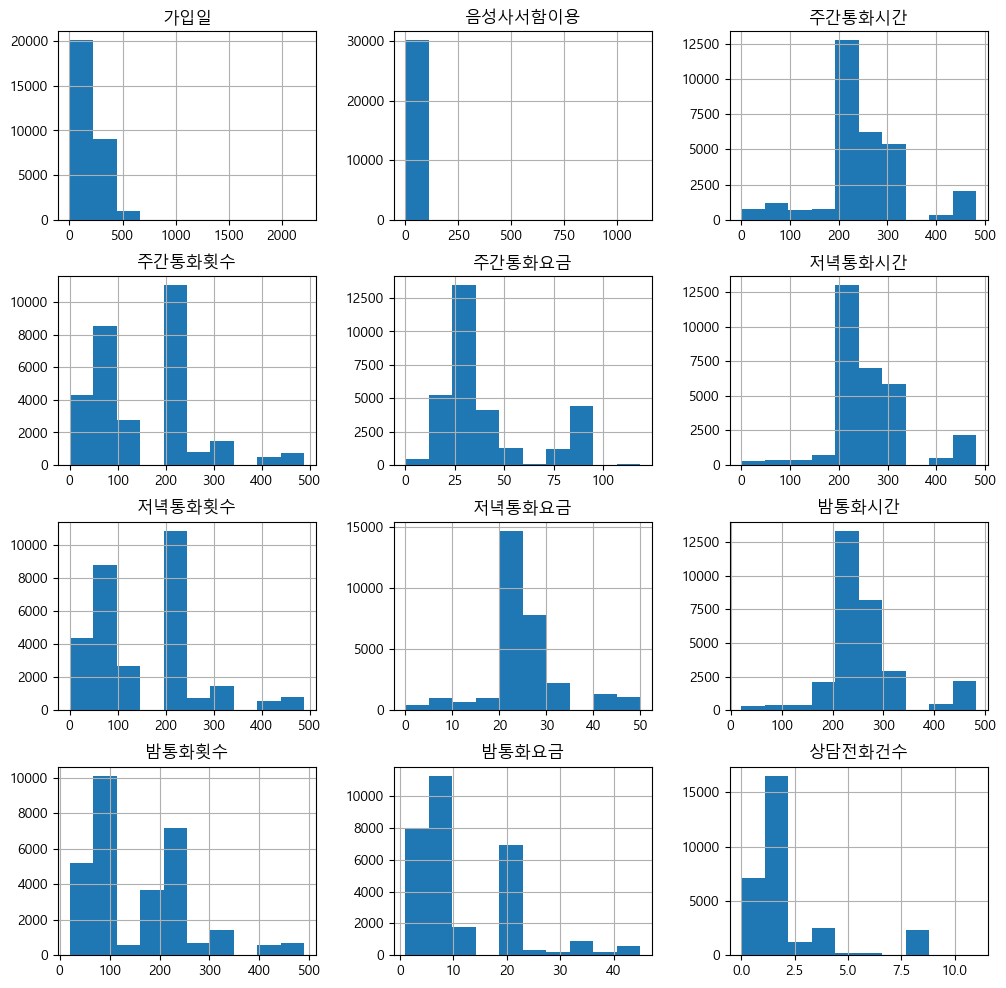

In [10]:
# 전체 데이터 분포 확인
plt.rc('font', family='Malgun Gothic')
except_cancel = train.drop('전화해지여부', axis=1)
except_cancel.hist(figsize=(12,12))
plt.show()


In [11]:
# # 상담전화건수에 따른 전화해지 여부
# fig, ax = plt.subplots(figsize=(7,4), dpi =100)

# cancel_customcall = train[train['전화해지여부']==1].groupby('상담전화건수')['전화해지여부'].count()
# cancel_customcall.plot()
train[train['전화해지여부']==1].groupby('상담전화건수')['전화해지여부'].count()

상담전화건수
0      607
1       80
2     1678
3      194
4      252
5       58
6      112
7        7
8      313
9       15
11       2
Name: 전화해지여부, dtype: int64

In [12]:
train[train['전화해지여부']==0].groupby('상담전화건수')['전화해지여부'].count()

상담전화건수
0      5696
1       754
2     14844
3       986
4      2288
5       176
6        91
7         6
8      2021
9         3
11       17
Name: 전화해지여부, dtype: int64

In [13]:
train[train['전화해지여부']==1].groupby('주간통화시간')['전화해지여부'].count()

주간통화시간
0.1      2
0.6      1
0.9      1
1.1      1
1.3      1
        ..
478.4    1
478.9    1
479.6    2
480.7    1
481.9    1
Name: 전화해지여부, Length: 1172, dtype: int64

<AxesSubplot:xlabel='전화해지여부', ylabel='음성사서함이용'>

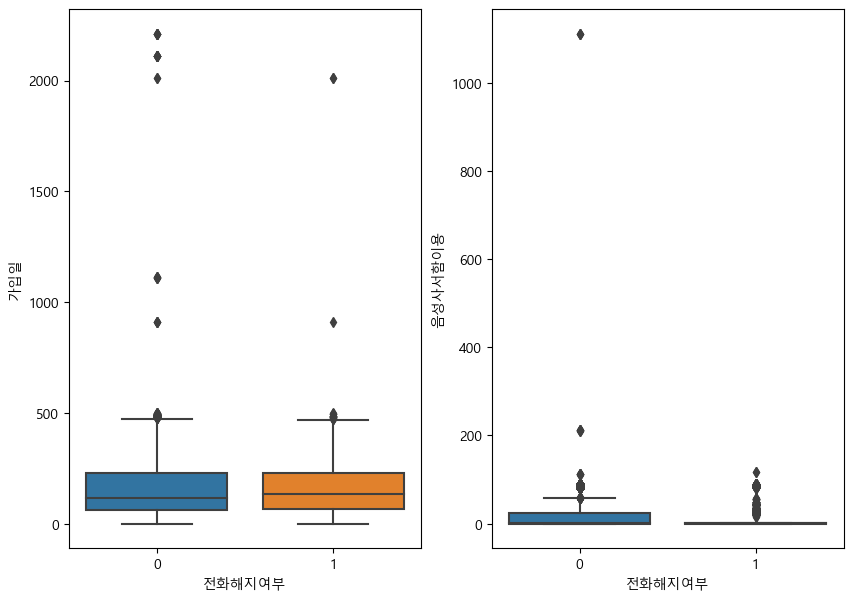

In [14]:
# 이상치 확인
fig, ax = plt.subplots(1,2,figsize=(10,7))

sns.boxplot(x=train['전화해지여부'], y=train['가입일'], ax=ax[0])
sns.boxplot(x=train['전화해지여부'], y=train['음성사서함이용'], ax=ax[1])

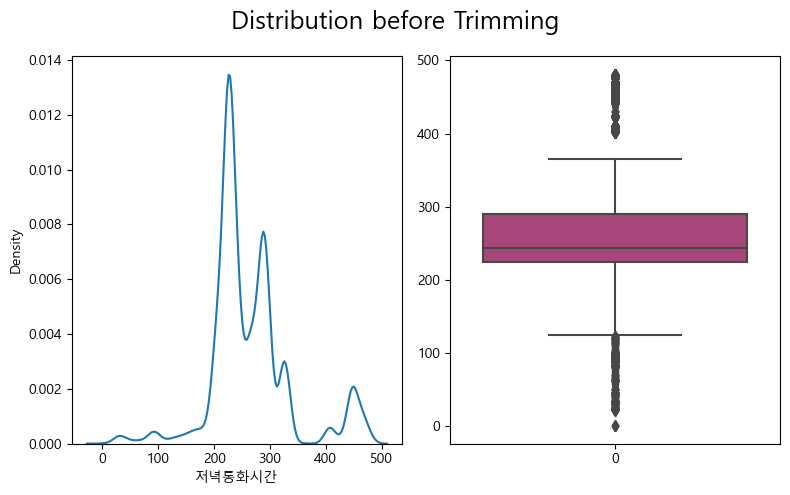

In [15]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution before Trimming", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data =train["저녁통화시간"])
plt.subplot(1,2,2)
sns.boxplot(data = train["저녁통화시간"], palette="magma")
plt.tight_layout()
plt.show()

In [16]:
q1 = train["저녁통화시간"].quantile(0.25)
q2 = train["저녁통화시간"].quantile(0.75)

IQR =q2-q1

max_limit=q2+(1.5*IQR)
min_limit=q1-(1.5*IQR)

import numpy as np
df_new = train[(min_limit<=train["저녁통화시간"]) & (train["저녁통화시간"]<=max_limit)]

In [17]:
df_new

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,TRAIN_30195,263,80,289.6,201,21.8,280.5,323,29.88,208.0,66,9.28,2,0
30196,TRAIN_30196,283,81,210.7,280,90.5,284.1,202,32.80,287.8,203,6.28,2,0
30197,TRAIN_30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,95,4.22,2,0
30198,TRAIN_30198,63,1,262.4,202,29.6,280.6,282,28.88,280.9,207,20.88,2,1


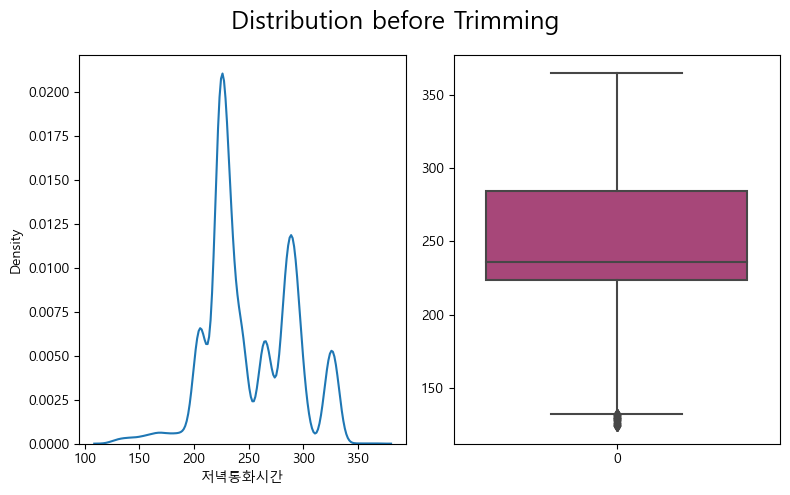

In [18]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution before Trimming", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data =df_new["저녁통화시간"])
plt.subplot(1,2,2)
sns.boxplot(data = df_new["저녁통화시간"], palette="magma")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='전화해지여부', ylabel='밤통화횟수'>

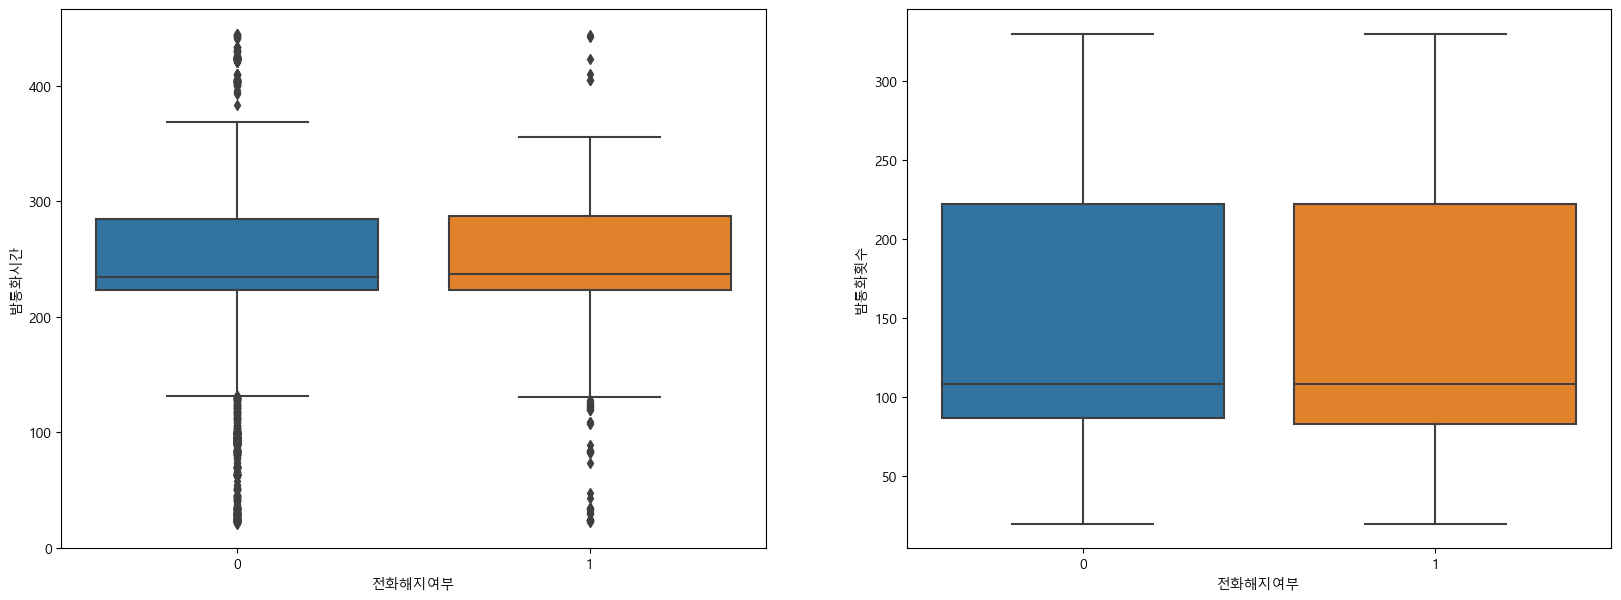

In [19]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.boxplot(x=df_new['전화해지여부'], y=df_new['밤통화시간'], ax=ax[0])
sns.boxplot(x=df_new['전화해지여부'], y=df_new['밤통화횟수'], ax=ax[1])

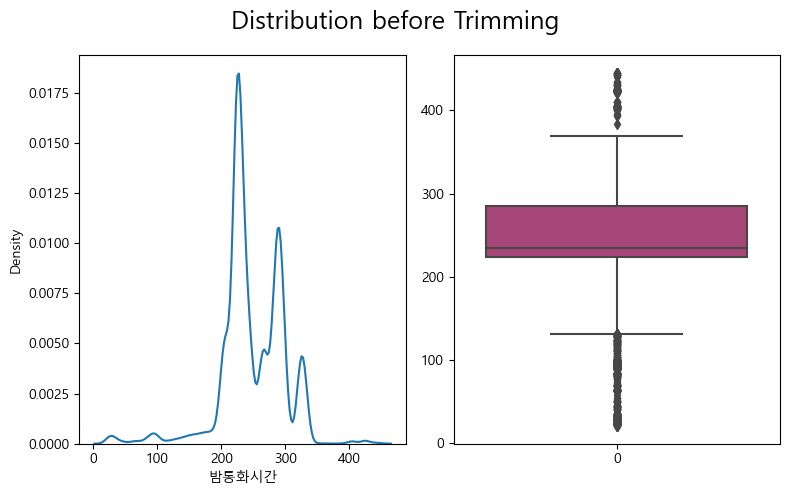

In [20]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution before Trimming", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data =df_new['밤통화시간'])
plt.subplot(1,2,2)
sns.boxplot(data = df_new['밤통화시간'], palette="magma")
plt.tight_layout()
plt.show()

In [21]:
q1 = df_new["밤통화시간"].quantile(0.25)
q2 = df_new["밤통화시간"].quantile(0.75)

IQR =q2-q1

max_limit=q2+(1.5*IQR)
min_limit=q1-(1.5*IQR)

import numpy as np
df_new2 = df_new[(min_limit<=df_new["밤통화시간"]) & (df_new["밤통화시간"]<=max_limit)]

In [22]:
df_new2

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,TRAIN_30195,263,80,289.6,201,21.8,280.5,323,29.88,208.0,66,9.28,2,0
30196,TRAIN_30196,283,81,210.7,280,90.5,284.1,202,32.80,287.8,203,6.28,2,0
30197,TRAIN_30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,95,4.22,2,0
30198,TRAIN_30198,63,1,262.4,202,29.6,280.6,282,28.88,280.9,207,20.88,2,1


<AxesSubplot:xlabel='전화해지여부', ylabel='밤통화횟수'>

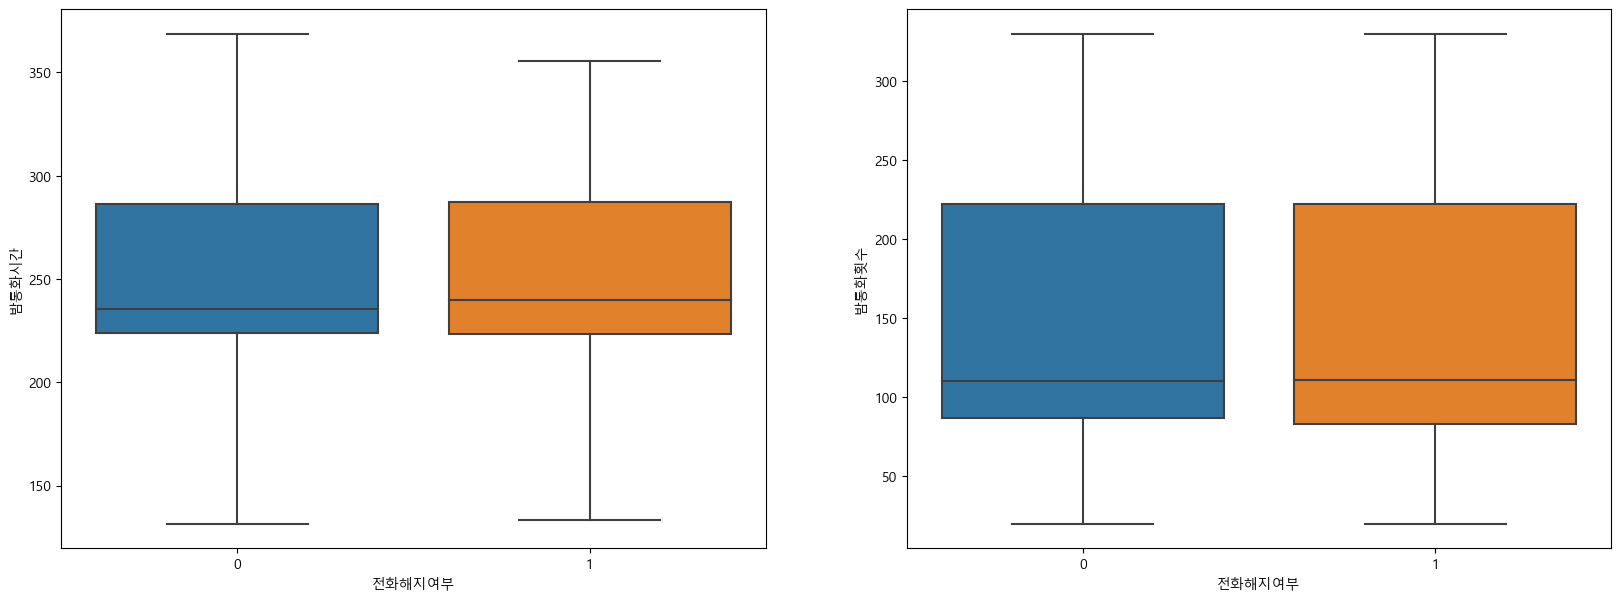

In [23]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.boxplot(x=df_new2['전화해지여부'], y=df_new2['밤통화시간'], ax=ax[0])
sns.boxplot(x=df_new2['전화해지여부'], y=df_new2['밤통화횟수'], ax=ax[1])

<AxesSubplot:xlabel='전화해지여부', ylabel='밤통화요금'>

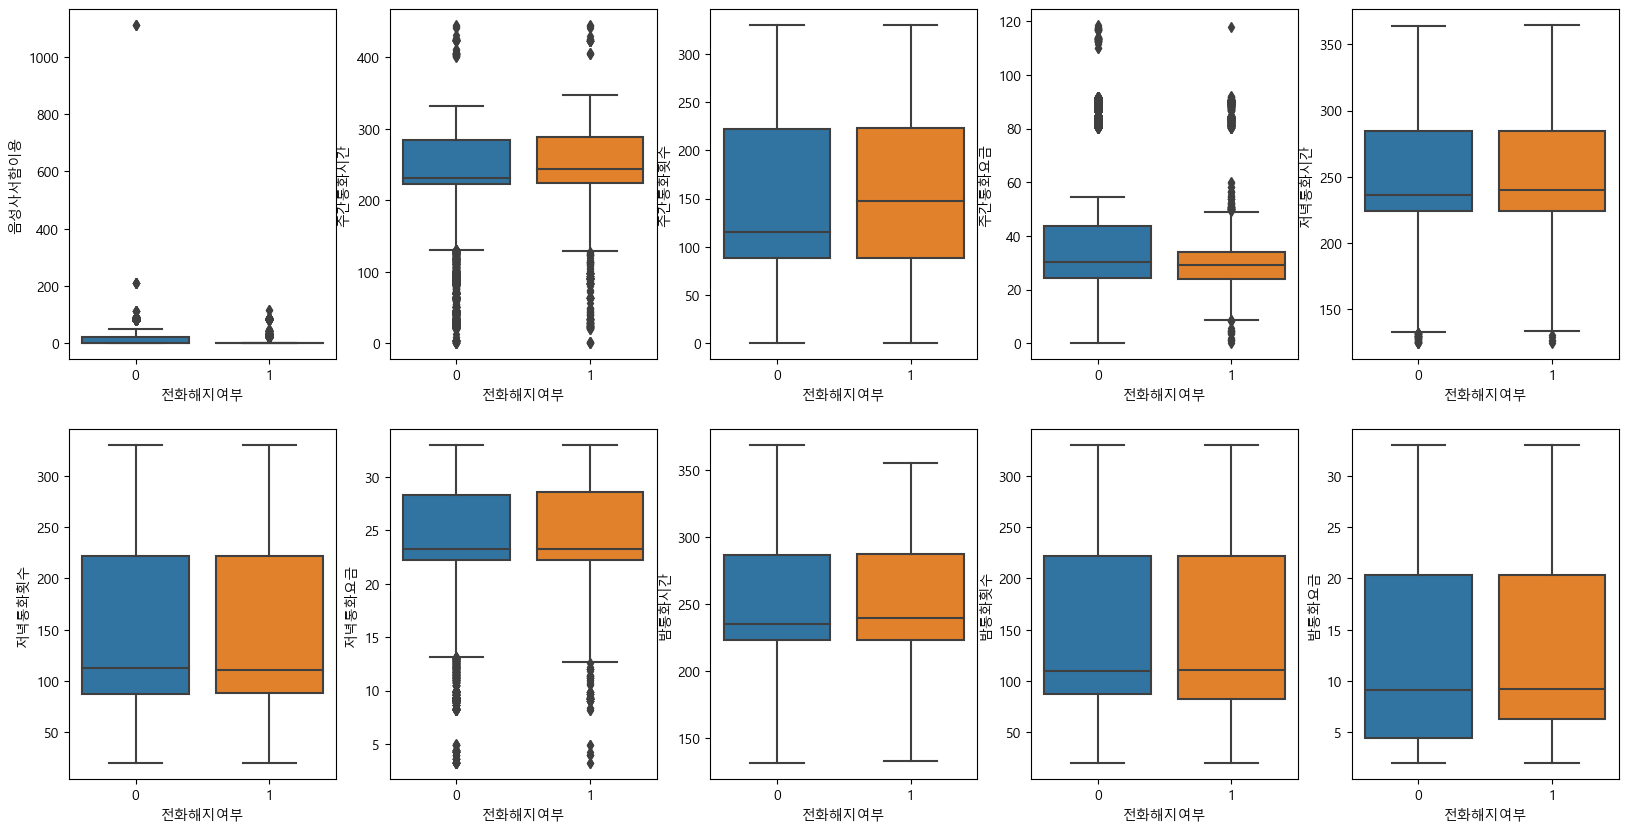

In [24]:
fig, ax = plt.subplots(2,5,figsize=(20,10))
sns.boxplot(x=df_new2['전화해지여부'], y=df_new2['음성사서함이용'], ax=ax[0][0])
sns.boxplot(x=df_new2['전화해지여부'], y=df_new2['주간통화시간'], ax=ax[0][1])
sns.boxplot(x=df_new2['전화해지여부'], y=df_new2['주간통화횟수'], ax=ax[0][2])
sns.boxplot(x=df_new2['전화해지여부'], y=df_new2['주간통화요금'], ax=ax[0][3])
sns.boxplot(x=df_new2['전화해지여부'], y=df_new2['저녁통화시간'], ax=ax[0][4])
sns.boxplot(x=df_new2['전화해지여부'], y=df_new2['저녁통화횟수'], ax=ax[1][0])
sns.boxplot(x=df_new2['전화해지여부'], y=df_new2['저녁통화요금'], ax=ax[1][1])
sns.boxplot(x=df_new2['전화해지여부'], y=df_new2['밤통화시간'], ax=ax[1][2])
sns.boxplot(x=df_new2['전화해지여부'], y=df_new2['밤통화횟수'], ax=ax[1][3])
sns.boxplot(x=df_new2['전화해지여부'], y=df_new2['밤통화요금'], ax=ax[1][4])


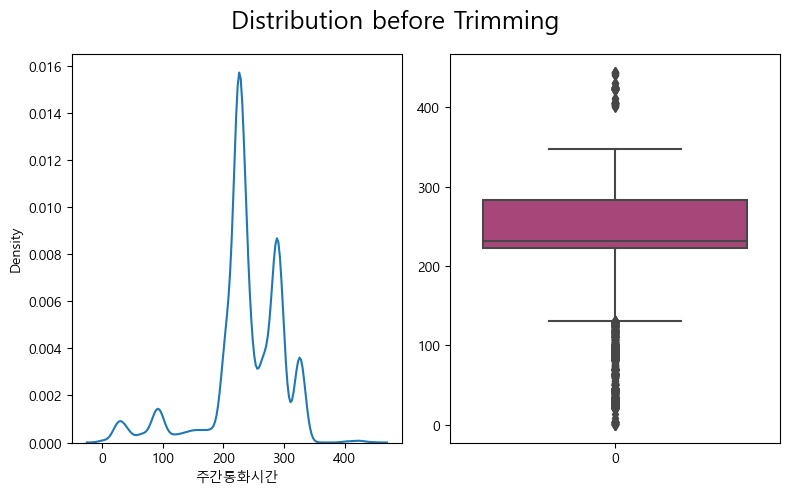

In [25]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution before Trimming", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data =df_new2['주간통화시간'])
plt.subplot(1,2,2)
sns.boxplot(data = df_new2['주간통화시간'], palette="magma")
plt.tight_layout()
plt.show()

In [26]:
q1 = df_new2["주간통화시간"].quantile(0.25)
q2 = df_new2["주간통화시간"].quantile(0.75)

IQR =q2-q1

max_limit=q2+(1.5*IQR)
min_limit=q1-(1.5*IQR)

import numpy as np
df_new3 = df_new2[(min_limit<=df_new2["주간통화시간"]) & (df_new2["주간통화시간"]<=max_limit)]

<AxesSubplot:xlabel='전화해지여부', ylabel='밤통화요금'>

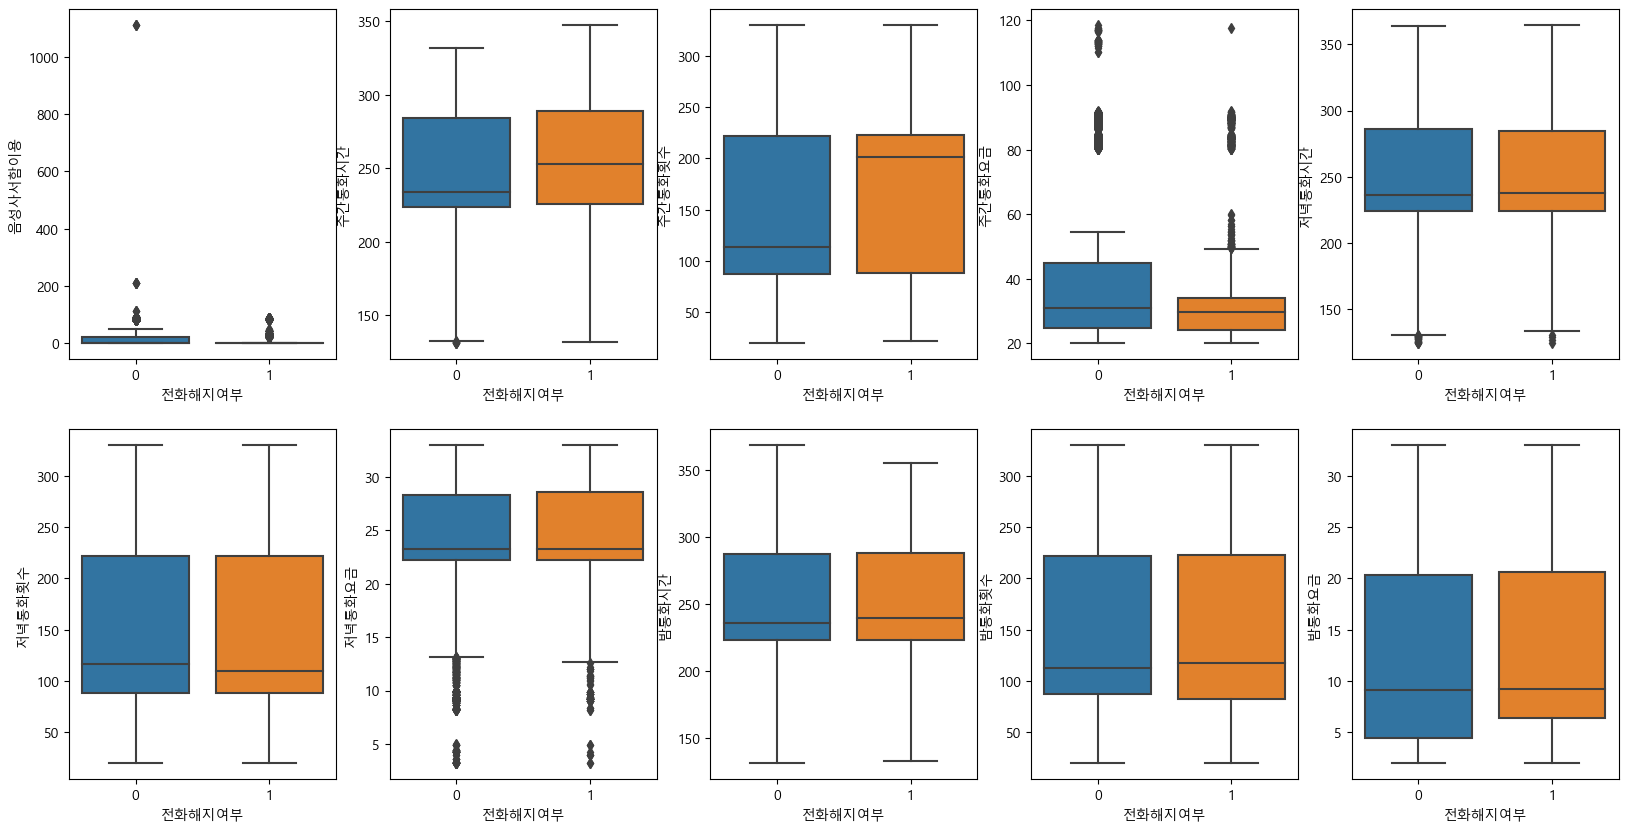

In [27]:
fig, ax = plt.subplots(2,5,figsize=(20,10))
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['음성사서함이용'], ax=ax[0][0])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['주간통화시간'], ax=ax[0][1])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['주간통화횟수'], ax=ax[0][2])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['주간통화요금'], ax=ax[0][3])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['저녁통화시간'], ax=ax[0][4])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['저녁통화횟수'], ax=ax[1][0])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['저녁통화요금'], ax=ax[1][1])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['밤통화시간'], ax=ax[1][2])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['밤통화횟수'], ax=ax[1][3])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['밤통화요금'], ax=ax[1][4])


In [28]:
q1 = df_new3["저녁통화요금"].quantile(0.25)
q2 = df_new3["저녁통화요금"].quantile(0.75)

IQR =q2-q1

max_limit=q2+(1.5*IQR)
min_limit=q1-(1.5*IQR)

import numpy as np
df_new3 = df_new3[(min_limit<=df_new3["저녁통화요금"]) & (df_new3["저녁통화요금"]<=max_limit)]

<AxesSubplot:xlabel='전화해지여부', ylabel='밤통화요금'>

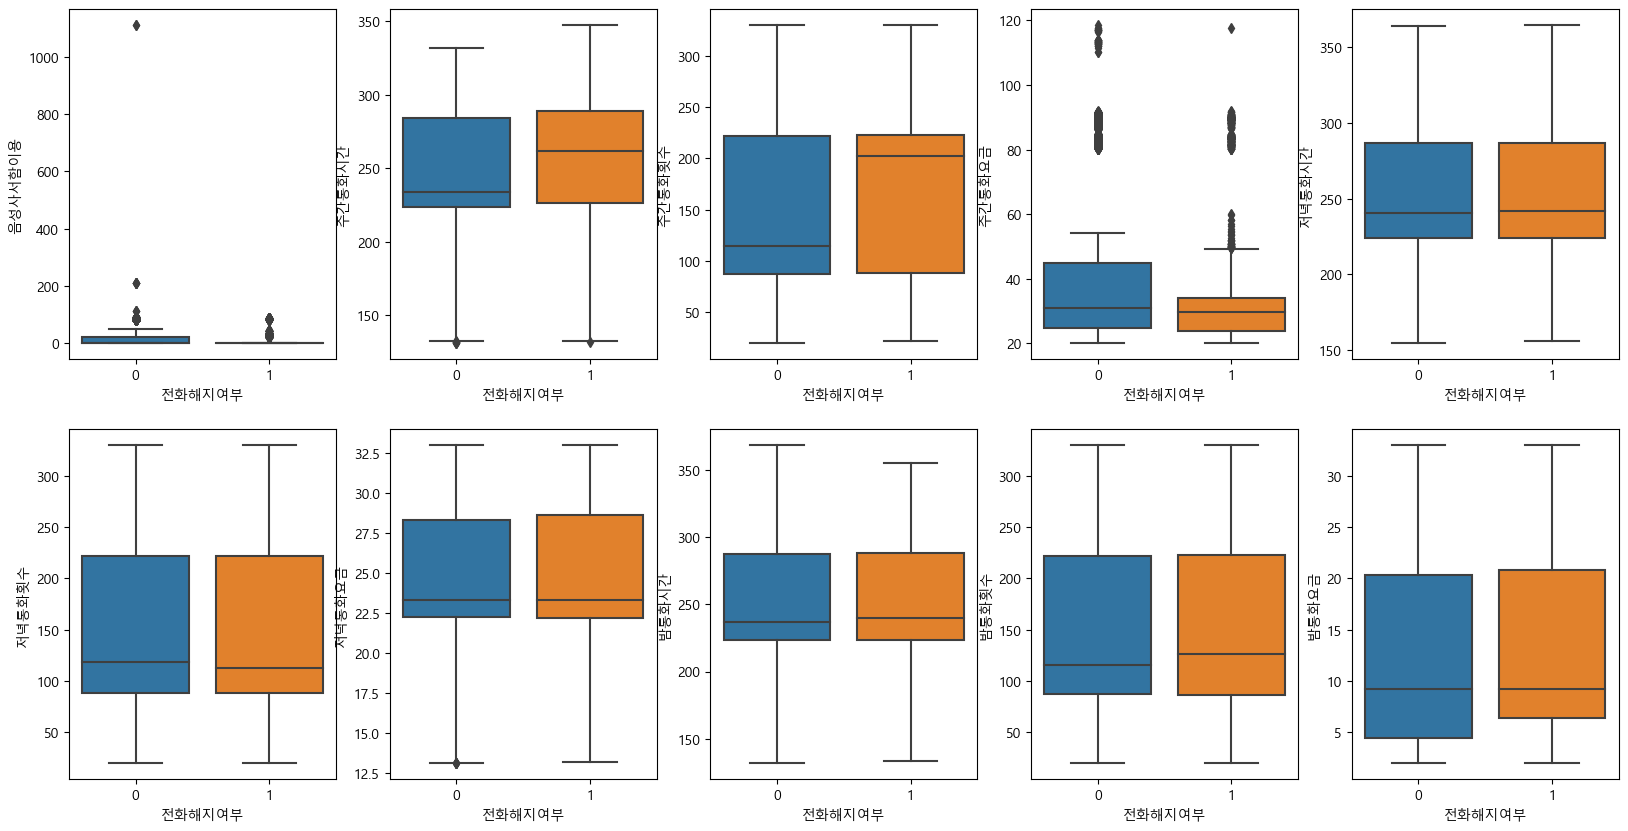

In [29]:
fig, ax = plt.subplots(2,5,figsize=(20,10))
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['음성사서함이용'], ax=ax[0][0])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['주간통화시간'], ax=ax[0][1])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['주간통화횟수'], ax=ax[0][2])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['주간통화요금'], ax=ax[0][3])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['저녁통화시간'], ax=ax[0][4])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['저녁통화횟수'], ax=ax[1][0])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['저녁통화요금'], ax=ax[1][1])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['밤통화시간'], ax=ax[1][2])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['밤통화횟수'], ax=ax[1][3])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['밤통화요금'], ax=ax[1][4])

In [30]:
q1 = df_new3["주간통화요금"].quantile(0.25)
q2 = df_new3["주간통화요금"].quantile(0.75)

IQR =q2-q1

max_limit=q2+(1.5*IQR)
min_limit=q1-(1.5*IQR)

import numpy as np
df_new3 = df_new3[(min_limit<=df_new3["주간통화요금"]) & (df_new3["주간통화요금"]<=max_limit)]

<AxesSubplot:xlabel='전화해지여부', ylabel='밤통화요금'>

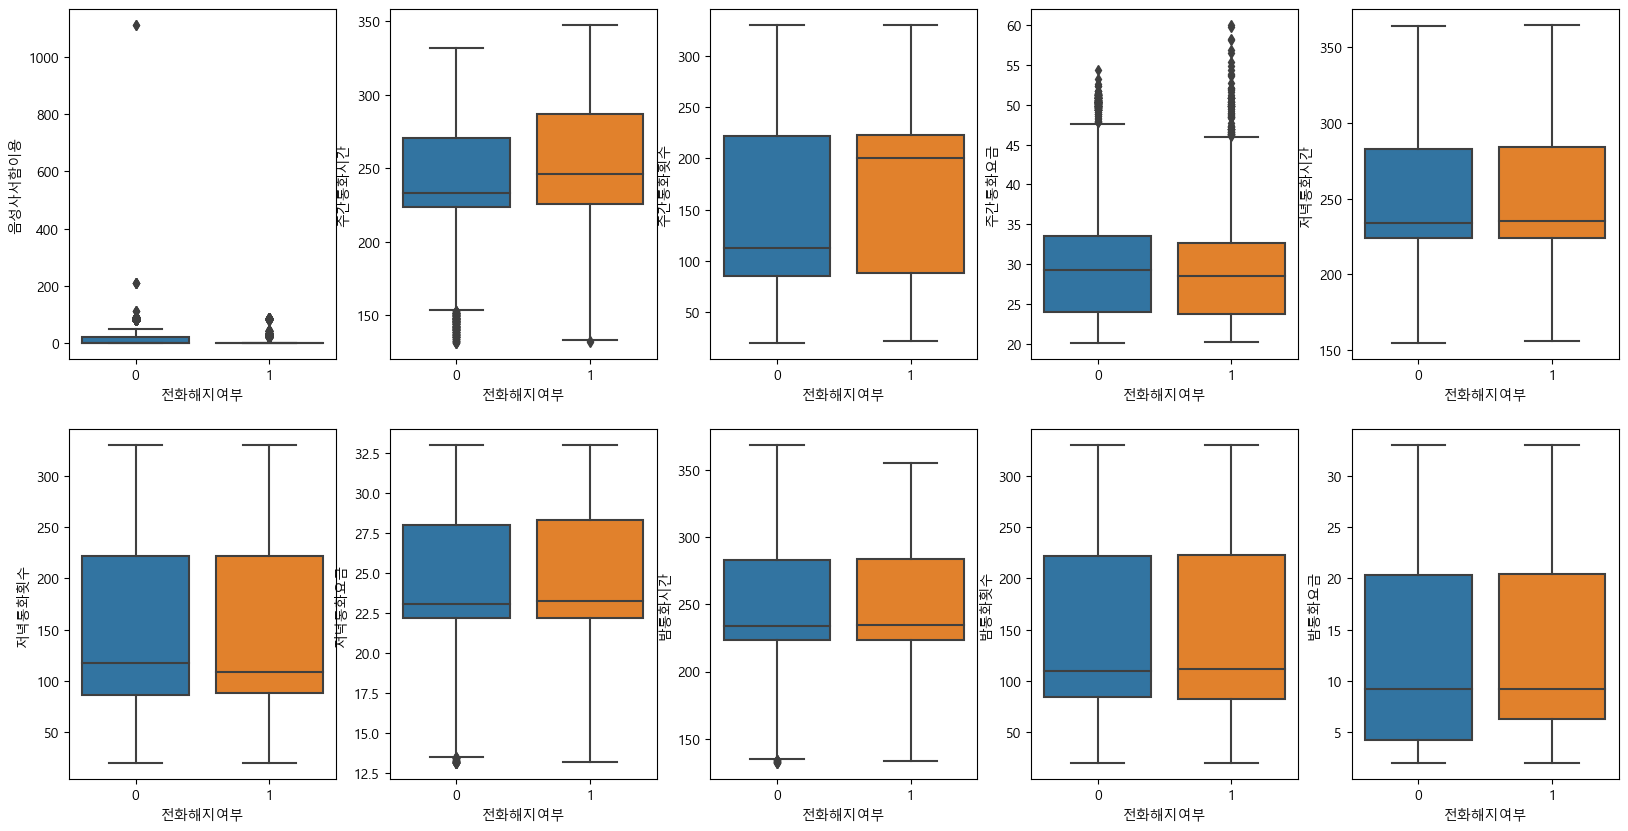

In [31]:
fig, ax = plt.subplots(2,5,figsize=(20,10))
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['음성사서함이용'], ax=ax[0][0])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['주간통화시간'], ax=ax[0][1])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['주간통화횟수'], ax=ax[0][2])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['주간통화요금'], ax=ax[0][3])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['저녁통화시간'], ax=ax[0][4])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['저녁통화횟수'], ax=ax[1][0])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['저녁통화요금'], ax=ax[1][1])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['밤통화시간'], ax=ax[1][2])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['밤통화횟수'], ax=ax[1][3])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['밤통화요금'], ax=ax[1][4])

<AxesSubplot:>

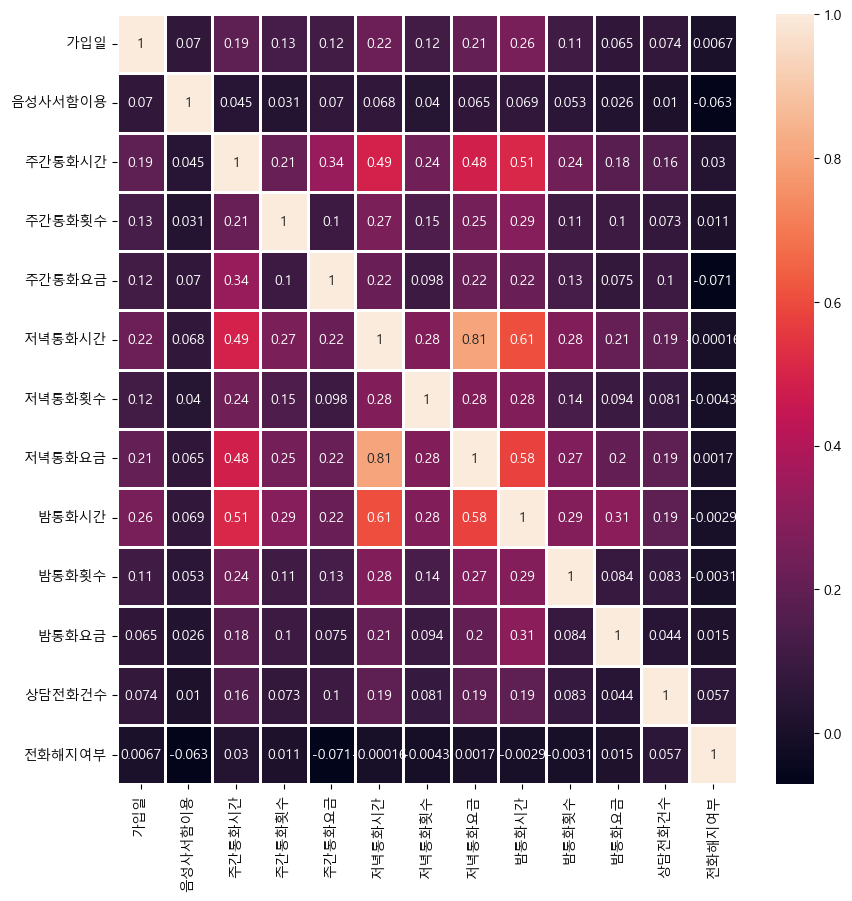

In [32]:
# 상관관계 시각화
plt.figure(figsize=(10,10))

train_corr = train.corr()
sns.heatmap(train_corr, annot=True, linewidths=1)

In [33]:
import random
import os
import numpy as np

#sklearn module & utils
from tqdm.notebook import tqdm
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import StratifiedKFold , KFold, train_test_split, cross_val_score, cross_validate
from sklearn.feature_selection import SelectPercentile
warnings.filterwarnings('ignore') 

#Scaling
from sklearn.preprocessing import StandardScaler, LabelEncoder

#Modeling
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [34]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [35]:
x_train = train.drop(['ID', '전화해지여부'], axis=1)
y_train = train['전화해지여부']

test = pd.read_csv('./data/test.csv')
test = test.drop('ID', axis=1)

In [36]:
model=[
    ('bag', BaggingClassifier(random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42)),
    ('lgb', LGBMClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
]

In [37]:
best_model = VotingClassifier(model, voting='hard', weights=[1,2,2,1,3])
best_model.fit(x_train,y_train)

VotingClassifier(estimators=[('bag', BaggingClassifier(random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_po...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                         

In [38]:
pred = best_model.predict(test)

In [39]:
submit = pd.read_csv('./data/sample_submission.csv')

In [40]:
submit['전화해지여부'] = pred
submit.head()

,ID,전화해지여부
0,TEST_00000,0
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,1


In [41]:
submit.to_csv('./result/EDA_re(8).csv', index=False)